# Multiplanes
* Multiplanes
* Random planes

## Single plane hash functions

- Number every single region that is formed by the intersection of n planes.
- Use those regions as "buckets" for hashing 

#### Helper function for plotting vectors

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


### Plotting Normal Vector on Single plane:

Vectors do not 
The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

Feel free to change the direction of the plane `P`.

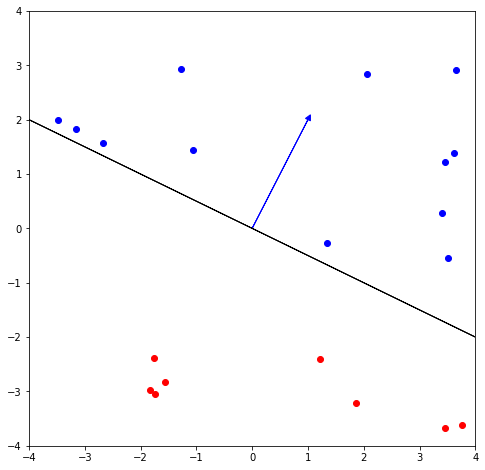

In [13]:
def plot_normal_vector_to_plan():
    P = np.array([[1, 2]])  # Define a single plane. You may change the direction

    # Get a new plane perpendicular to P. We use a rotation matrix
    PT = np.dot([[0, 1], [-1, 0]], P.T).T  

    fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

    plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

    # Plot the plane P as a 2 vectors. 
    # We scale by 2 just to get the arrows outside the current box
    plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

    # Plot 20 random points. 
    for i in range(0, 20):
            v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
            side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
            # Color the points depending on the sign of the result of np.dot(P, point.T)
            if side_of_plane == 1:
                ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
            else:
                ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

    plt.show()
plot_normal_vector_to_plan()

Now, let us see what is inside the code that color the points. 

In [14]:
# Define plane and some vectors
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

# calculate the respective dot products
np.dot(P, v1.T)
np.dot(P, v2.T)
np.dot(P, v3.T)

#calculate the side of the plane. +1 or -1
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix 
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

side_of_plane(P, v1) # In which side is [1, 2]
side_of_plane(P, v2) # In which side is [-1, 1]
side_of_plane(P, v3) # In which side is [-2, -1]

## Hash Function with multiple planes

The hash function creates bins based on which side of the planes vector is.

In [27]:
# Define multiple planes
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
planes = [P1, P2, P3]  # List of arrays. It is the multi plane

# Vector to be searched
v = np.array([[2, 2]])

# Find the number of the plane that containes Vector
def hash_multi_plane(planes: np.ndarray, v: np.ndarray) -> int:
    hash_value = 0
    for i, P in enumerate(planes):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

hash_multi_plane(planes, v) 

3

## Random Planes

The next function is similar to the `side_of_plane()` function, but it evaluates more than a plane each time. 
The result is an array with the side of the plane of `v`, for the set of planes `P`

Get the side of the plane of the vector `[2, 2]` for the set of random planes. 

Now, let us use the former function to define our multiplane hash function

Print the bucket hash for the vector `v = [2, 2]`. 

#### Note
This showed you how to make one set of random planes.  You will make multiple sets of random planes in order to make the approximate nearest neighbors more accurate.

In [ ]:

# define three random planes
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

v = np.array([[2, 2]])

# Side of the plane function. The result is a matrix
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Get a boolean value telling if the value in the cell is positive or negative
    return sign_of_dot_product

sides_l = side_of_plane_matrix(
            random_planes_matrix, v)
sides_l

def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Get the value inside the matrix cell
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i # sum 2^i * hash_i
        
    return hash_value

hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

## Document vectors

Before we finish this lab, remember that you can represent a document as a vector by adding up the word vectors for the words inside the document. In this example, our embedding contains only three words, each represented by a 3D array.

In [ ]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
    
print(document_embedding)